In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib
import os,sys
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import itertools
import scipy.stats
from sklearn import metrics
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer,SimpleImputer
from sklearn.model_selection import train_test_split,cross_val_score,KFold,RepeatedKFold,LeaveOneOut,LeavePOut,ShuffleSplit,StratifiedKFold,StratifiedShuffleSplit
from sklearn.model_selection import LeaveOneGroupOut,LeavePGroupsOut,GroupKFold,LeavePGroupsOut,GroupShuffleSplit
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn import feature_selection, svm
from sklearn.decomposition import FastICA, PCA, IncrementalPCA
from sklearn import ensemble
from sklearn.multioutput import MultiOutputRegressor,MultiOutputClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.inspection import permutation_importance
from sklearn import neighbors,tree
from sklearn.neural_network import MLPClassifier,MLPRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.cluster import KMeans
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import pickle
import pandas as pd
import numpy as np
# module_path = os.path.abspath(os.path.join('C:\\Users\\Rodrigo\\Desktop\\PhD\\1st Study'))
# if module_path not in sys.path:
#     sys.path.append(module_path)
# from Process_Features import *

Using matplotlib backend: Qt5Agg


## Classification

In [2]:
dataframe = pd.read_csv(r'G:\O meu disco\PhD\1st Study\Physiological_Data\Results\Features_full_delta.csv',sep=";",index_col=False)
dataframe

,Avg HR,Min HR,Max HR,SD,AVG RR,Minimum RR,Maximum RR,SDNN,RMSSD,NN50,...,Minimum Hbt,Maximum Hbt,STD Hbt,AVG Temp,Max Temp,Min Temp,STD Temp,Category,Video,User
0,-3.733309,0.956534,-16.401213,-2.671182,0.038215,0.139016,-0.011983,-23.0810,-5.1720,-1,...,5.263177,-10.049520,1.528840,1.136320,0.822270,1.318744,-0.242350,Erotic,Erotic/2000.avi,P1
1,3.206748,4.996507,3.871160,0.420220,-0.068207,-0.062982,-0.129978,1.1904,-3.3437,-64,...,-3.775306,-7.749664,0.375781,-0.630799,-0.941171,0.128032,-0.335400,Erotic,Erotic/2000.avi,P10
2,4.877250,5.578761,1.275780,-0.508398,-0.061825,-0.013985,-0.078983,-9.2445,-6.8828,-12,...,0.108768,4.138544,0.238746,0.384488,0.190337,0.598340,-0.146242,Erotic,Erotic/2000.avi,P11
3,5.023491,11.518747,3.467272,-0.386410,-0.043949,-0.026987,-0.118987,-6.4655,-4.1007,0,...,-3.934175,-0.792195,-0.161039,0.239745,0.175855,0.370290,-0.022338,Erotic,Erotic/2000.avi,P12
4,-2.984747,-0.050324,-12.367102,-1.261976,0.049561,0.161020,0.001021,-15.3093,-0.8910,-44,...,-4.040928,-11.061583,-0.890290,1.370254,1.116475,1.647843,-0.150244,Erotic,Erotic/2000.avi,P13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,-3.810041,-0.787943,-5.921688,-0.698329,0.055172,0.064017,0.015021,-2.3041,8.3360,-48,...,1.088217,1.436796,1.188224,0.100538,0.090133,0.150562,-0.022129,Social Positive,Social Positive/4009.avi,P4
696,-2.067272,-0.384613,-2.541969,-0.281476,0.029839,0.025015,0.007020,-1.3192,-4.4677,-65,...,7.870694,20.190356,0.128562,4.956082,4.379898,5.292868,-0.222566,Social Positive,Social Positive/4009.avi,P6
697,0.308669,4.011143,-11.548660,-2.285588,-0.007798,0.105016,-0.065982,-27.5649,-24.3200,-78,...,-3.892173,-5.111795,-0.388852,4.496067,4.252822,4.649309,-0.136860,Social Positive,Social Positive/4009.avi,P7
698,3.207969,7.058377,-1.428922,-0.748011,-0.023790,0.008011,-0.072986,-7.0806,-10.4174,-28,...,-2.001371,-23.116179,1.510267,1.174216,0.672956,1.738830,-0.293201,Social Positive,Social Positive/4009.avi,P8


In [3]:
dataframe_EEG = pd.read_csv(r'G:\O meu disco\PhD\1st Study\Physiological_Data\Results\Features_EEG_delta.csv',sep=";",index_col=False)
dataframe_EEG

,EEG_1_alpha,EEG_1_betha,EEG_1_gamma,EEG_1_theta,EEG_2_alpha,EEG_2_betha,EEG_2_gamma,EEG_2_theta,EEG_3_alpha,EEG_3_betha,...,EEG_31_betha,EEG_31_gamma,EEG_31_theta,EEG_32_alpha,EEG_32_betha,EEG_32_gamma,EEG_32_theta,Category,Video,User
0,1.311206e-13,-8.211357e-13,-6.662648e-13,4.167963e-12,-8.531383e-13,-4.978688e-13,-1.985926e-13,4.670935e-12,-4.613154e-13,-4.879071e-11,...,-1.024184e-12,-5.237893e-13,5.848379e-12,-1.392099e-12,-2.779267e-13,5.525791e-14,1.146095e-12,Erotic,Erotic/2000.avi,P1
1,1.393050e-16,-1.996914e-14,-9.794725e-15,4.536016e-14,-1.859050e-14,-5.834273e-14,-1.635274e-14,4.148659e-14,3.898391e-14,-6.622288e-14,...,-3.329490e-12,-4.980474e-13,-1.339895e-12,-1.998401e-14,-1.579758e-14,-9.220993e-15,1.024376e-16,Erotic,Erotic/2000.avi,P10
2,-8.291718e-13,6.592952e-13,1.403905e-12,1.460688e-12,-2.997790e-12,-4.130040e-14,2.173754e-13,1.033336e-12,-4.241903e-12,1.806991e-12,...,-5.892291e-13,1.114609e-12,2.656499e-13,-8.282411e-11,-6.394146e-12,-6.753035e-13,-7.961179e-14,Erotic,Erotic/2000.avi,P11
3,1.587905e-14,8.353623e-13,8.924402e-13,-2.745864e-13,-2.313184e-14,4.636509e-13,5.463453e-13,-3.938736e-13,4.372898e-14,5.407969e-13,...,1.331206e-14,3.592885e-14,1.672772e-13,-7.195037e-14,-4.771046e-14,-6.618618e-14,-1.066258e-13,Erotic,Erotic/2000.avi,P12
4,-6.744050e-12,-6.990077e-12,6.336804e-12,-3.971411e-12,-9.540566e-12,-9.871639e-12,1.169525e-11,-1.145384e-11,-6.188863e-11,-9.900538e-11,...,-1.406938e-12,4.967841e-13,-4.048148e-12,-9.136202e-12,-1.046613e-11,1.373362e-11,-4.653478e-11,Erotic,Erotic/2000.avi,P13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,2.428697e-14,-1.164356e-13,-1.212692e-13,7.557942e-14,8.533828e-13,-2.194238e-12,-3.143462e-12,4.884210e-12,8.309623e-13,-2.028551e-12,...,-8.801393e-14,-1.530151e-13,-6.628362e-16,2.451454e-14,7.952066e-15,3.947701e-14,6.507049e-14,Social Positive,Social Positive/4009.avi,P4
696,2.284181e-11,-2.041222e-12,-3.318302e-13,-3.070980e-11,2.176765e-11,-1.446047e-12,4.342993e-12,7.554697e-12,1.020811e-11,-6.630179e-12,...,4.873177e-14,8.482077e-13,8.164699e-12,1.933311e-13,-5.708288e-14,1.806412e-13,2.922056e-12,Social Positive,Social Positive/4009.avi,P6
697,1.198226e-12,-1.504951e-14,1.715737e-14,8.038409e-12,1.968004e-12,-8.547596e-12,-9.525669e-12,3.074411e-11,-5.080854e-13,-1.275800e-12,...,-4.223615e-13,-1.383544e-12,5.397276e-12,-2.151880e-11,-2.687082e-11,-8.955647e-12,-5.147724e-11,Social Positive,Social Positive/4009.avi,P7
698,6.595088e-12,8.745042e-14,-2.778939e-13,5.327114e-11,1.037284e-13,-7.902256e-14,-2.073790e-13,3.270067e-12,1.295579e-10,9.672477e-11,...,2.410644e-13,7.061289e-12,2.195794e-11,-8.202158e-12,-3.035589e-12,-9.396664e-13,-2.092200e-11,Social Positive,Social Positive/4009.avi,P8


In [4]:
columns = dataframe.columns[:(len(dataframe.columns)-3)]
columns[-1]

'STD Temp'

In [5]:
columns_EEG = dataframe_EEG.columns[:(len(dataframe_EEG.columns)-3)]

In [6]:
full_dataframe = pd.concat([dataframe_EEG[columns_EEG],dataframe],axis=1)
full_dataframe

,EEG_1_alpha,EEG_1_betha,EEG_1_gamma,EEG_1_theta,EEG_2_alpha,EEG_2_betha,EEG_2_gamma,EEG_2_theta,EEG_3_alpha,EEG_3_betha,...,Minimum Hbt,Maximum Hbt,STD Hbt,AVG Temp,Max Temp,Min Temp,STD Temp,Category,Video,User
0,1.311206e-13,-8.211357e-13,-6.662648e-13,4.167963e-12,-8.531383e-13,-4.978688e-13,-1.985926e-13,4.670935e-12,-4.613154e-13,-4.879071e-11,...,5.263177,-10.049520,1.528840,1.136320,0.822270,1.318744,-0.242350,Erotic,Erotic/2000.avi,P1
1,1.393050e-16,-1.996914e-14,-9.794725e-15,4.536016e-14,-1.859050e-14,-5.834273e-14,-1.635274e-14,4.148659e-14,3.898391e-14,-6.622288e-14,...,-3.775306,-7.749664,0.375781,-0.630799,-0.941171,0.128032,-0.335400,Erotic,Erotic/2000.avi,P10
2,-8.291718e-13,6.592952e-13,1.403905e-12,1.460688e-12,-2.997790e-12,-4.130040e-14,2.173754e-13,1.033336e-12,-4.241903e-12,1.806991e-12,...,0.108768,4.138544,0.238746,0.384488,0.190337,0.598340,-0.146242,Erotic,Erotic/2000.avi,P11
3,1.587905e-14,8.353623e-13,8.924402e-13,-2.745864e-13,-2.313184e-14,4.636509e-13,5.463453e-13,-3.938736e-13,4.372898e-14,5.407969e-13,...,-3.934175,-0.792195,-0.161039,0.239745,0.175855,0.370290,-0.022338,Erotic,Erotic/2000.avi,P12
4,-6.744050e-12,-6.990077e-12,6.336804e-12,-3.971411e-12,-9.540566e-12,-9.871639e-12,1.169525e-11,-1.145384e-11,-6.188863e-11,-9.900538e-11,...,-4.040928,-11.061583,-0.890290,1.370254,1.116475,1.647843,-0.150244,Erotic,Erotic/2000.avi,P13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,2.428697e-14,-1.164356e-13,-1.212692e-13,7.557942e-14,8.533828e-13,-2.194238e-12,-3.143462e-12,4.884210e-12,8.309623e-13,-2.028551e-12,...,1.088217,1.436796,1.188224,0.100538,0.090133,0.150562,-0.022129,Social Positive,Social Positive/4009.avi,P4
696,2.284181e-11,-2.041222e-12,-3.318302e-13,-3.070980e-11,2.176765e-11,-1.446047e-12,4.342993e-12,7.554697e-12,1.020811e-11,-6.630179e-12,...,7.870694,20.190356,0.128562,4.956082,4.379898,5.292868,-0.222566,Social Positive,Social Positive/4009.avi,P6
697,1.198226e-12,-1.504951e-14,1.715737e-14,8.038409e-12,1.968004e-12,-8.547596e-12,-9.525669e-12,3.074411e-11,-5.080854e-13,-1.275800e-12,...,-3.892173,-5.111795,-0.388852,4.496067,4.252822,4.649309,-0.136860,Social Positive,Social Positive/4009.avi,P7
698,6.595088e-12,8.745042e-14,-2.778939e-13,5.327114e-11,1.037284e-13,-7.902256e-14,-2.073790e-13,3.270067e-12,1.295579e-10,9.672477e-11,...,-2.001371,-23.116179,1.510267,1.174216,0.672956,1.738830,-0.293201,Social Positive,Social Positive/4009.avi,P8


In [7]:
full_columns = full_dataframe.columns[:(len(full_dataframe.columns)-3)]

## Scaler

In [8]:
scaler=StandardScaler()
min_max_scaler = MinMaxScaler()

## Split Columns by sensors

In [8]:
sensors = dict()
sensors["EEG"] = full_columns[0:128]
sensors["ECG"] = full_columns[128:151]
sensors["EDA"] = full_columns[151:177]
sensors["RESP"] = full_columns[177:200]
sensors["fnirs"] = full_columns[200:212]
sensors["SKT"] = full_columns[212:216]

In [9]:
sensors.keys()

dict_keys(['EEG', 'ECG', 'EDA', 'RESP', 'fnirs', 'SKT'])

In [18]:
EEG_columns = full_columns[0:128]
HR_columns = full_columns[128:151]
EDA_columns = full_columns[151:177]
RESP_columns = full_columns[177:200]
fnirs_columns = full_columns[200:212]
SKT_columns = full_columns[212:216]
temp_columns = ((EEG_columns.append(HR_columns)).append(EDA_columns)).append(RESP_columns)
list(temp_columns)

['EEG_1_alpha',
 'EEG_1_betha',
 'EEG_1_gamma',
 'EEG_1_theta',
 'EEG_2_alpha',
 'EEG_2_betha',
 'EEG_2_gamma',
 'EEG_2_theta',
 'EEG_3_alpha',
 'EEG_3_betha',
 'EEG_3_gamma',
 'EEG_3_theta',
 'EEG_4_alpha',
 'EEG_4_betha',
 'EEG_4_gamma',
 'EEG_4_theta',
 'EEG_5_alpha',
 'EEG_5_betha',
 'EEG_5_gamma',
 'EEG_5_theta',
 'EEG_6_alpha',
 'EEG_6_betha',
 'EEG_6_gamma',
 'EEG_6_theta',
 'EEG_7_alpha',
 'EEG_7_betha',
 'EEG_7_gamma',
 'EEG_7_theta',
 'EEG_8_alpha',
 'EEG_8_betha',
 'EEG_8_gamma',
 'EEG_8_theta',
 'EEG_9_alpha',
 'EEG_9_betha',
 'EEG_9_gamma',
 'EEG_9_theta',
 'EEG_10_alpha',
 'EEG_10_betha',
 'EEG_10_gamma',
 'EEG_10_theta',
 'EEG_11_alpha',
 'EEG_11_betha',
 'EEG_11_gamma',
 'EEG_11_theta',
 'EEG_12_alpha',
 'EEG_12_betha',
 'EEG_12_gamma',
 'EEG_12_theta',
 'EEG_13_alpha',
 'EEG_13_betha',
 'EEG_13_gamma',
 'EEG_13_theta',
 'EEG_14_alpha',
 'EEG_14_betha',
 'EEG_14_gamma',
 'EEG_14_theta',
 'EEG_15_alpha',
 'EEG_15_betha',
 'EEG_15_gamma',
 'EEG_15_theta',
 'EEG_16_alpha',

In [114]:
erotic_dataframe = full_dataframe[full_dataframe["Category"]=="Erotic"]
horror_dataframe = full_dataframe[dataframe["Category"]=="Horror"]
socialP_dataframe = full_dataframe[full_dataframe["Category"]=="Social Positive"]
socialN_dataframe = full_dataframe[full_dataframe["Category"]=="Social Negative"]
scenery_dataframe = full_dataframe[full_dataframe["Category"]=="Scenery"]

## All possible combinations of categories

In [10]:
def combinations(items):
    return ( set(itertools.compress(items,mask)) for mask in itertools.product(*[[0,1]]*len(items)) )

In [11]:
combination_categories = list(combinations(["Erotic","Horror","Social Negative","Social Positive","Scenery"]))
combination_sensors = list(combinations(sensors.keys()))
# combination_categories
len(combination_sensors)-1

63

## Input Data for models

In [9]:
X = np.array(full_dataframe[full_columns])
Y = np.array(full_dataframe[["Category"]])

In [111]:
X = np.array((((erotic_dataframe.append(scenery_dataframe)).append(horror_dataframe)))[columns])
Y = np.array((((erotic_dataframe.append(scenery_dataframe)).append(horror_dataframe)))[["Category"]])
# Y = np.array(full_dataframe[["Arousal"]])

In [15]:
X = np.array(dataframe[columns])
Y = np.array(dataframe[["Category"]])
# Y = np.array(full_dataframe[["Arousal"]])

In [5]:
X = np.array(dataframe_EEG[columns_EEG])
Y = np.array(dataframe_EEG[["Category"]])
# Y = np.array(dataframe[["Arousal"]])

In [10]:
groups=list()
for user in full_dataframe["User"]:
    groups.append(user.split("_")[0])
groups=np.array(groups)
users = np.unique(groups)

In [19]:
groups=list()
for user in dataframe["User"]:
    groups.append(user.split("_")[0])
groups=np.array(groups)
users = np.unique(groups)

In [112]:
groups=list()
for user in (((erotic_dataframe.append(scenery_dataframe)).append(horror_dataframe)))["User"]:
    groups.append(user.split("_")[0])
groups=np.array(groups)

In [11]:
imp = SimpleImputer(missing_values=np.nan,strategy = "mean")
imp.fit(X)
X = imp.transform(X)

In [12]:
np.isnan(X).any()

False

In [13]:
np.isinf(X).any()

False

## Plot PCA components

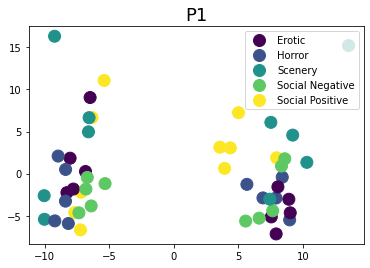

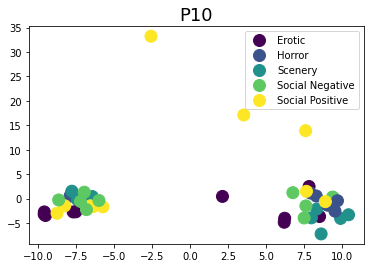

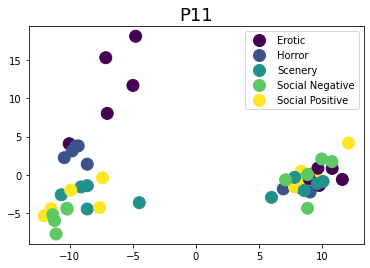

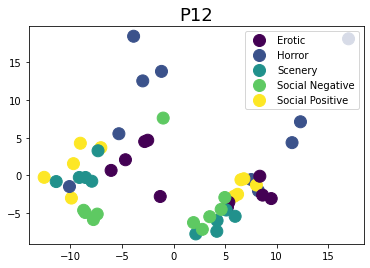

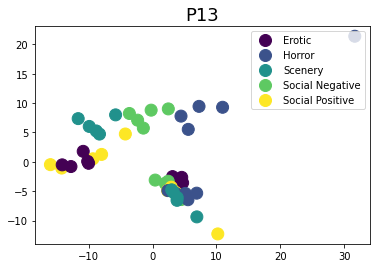

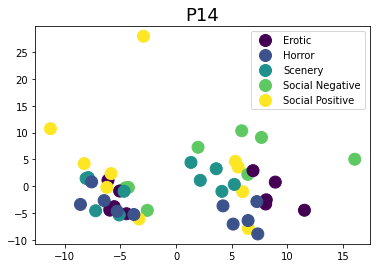

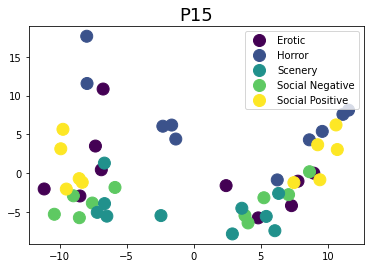

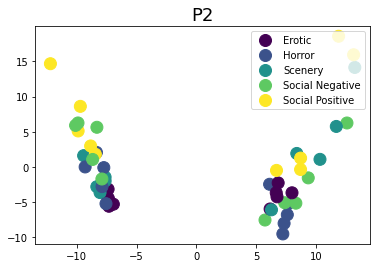

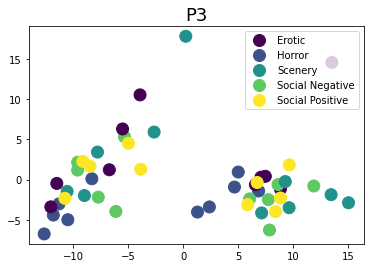

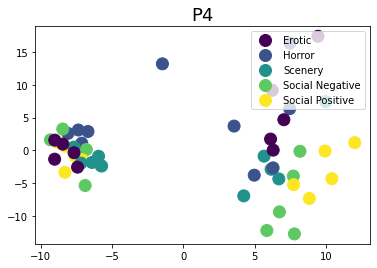

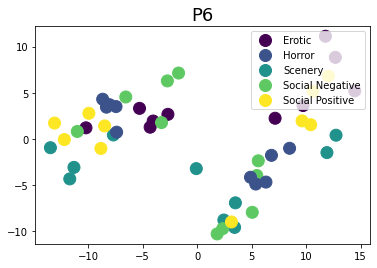

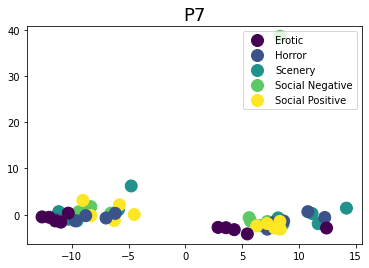

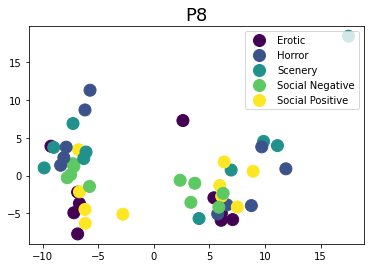

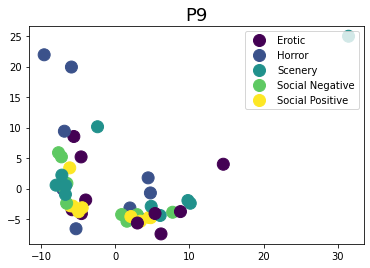

In [50]:
pca = PCA(n_components=3)

imp = SimpleImputer(missing_values=np.nan,strategy = "mean")
categories=["Erotic","Horror","Scenery","Social Negative","Social Positive"]
for user in users:
    
    X=np.array(full_dataframe[full_columns][full_dataframe["User"]==user])
    Y = np.array(full_dataframe["Category"][full_dataframe["User"]==user])
    
    colorlist=[]
    for category in full_dataframe["Category"][full_dataframe["User"]==user]:
        if category == "Erotic":
            colorlist.append(0)
        if category == "Horror":
            colorlist.append(1)
        if category == "Scenery":
            colorlist.append(2)
        if category == "Social Negative":
            colorlist.append(3)
        if category == "Social Positive":
            colorlist.append(4)

    imp.fit(X)
    X = imp.transform(X)
    
    scaler.fit(X,Y.ravel())
    X = scaler.transform(X)
    
    result = pca.fit(X)
    X_pca = result.transform(X)
        
    plt.figure()
    plt.title(user,fontsize=18)
    scatter = plt.scatter(X_pca[:,0],X_pca[:,1],c=colorlist,s=144)
    plt.legend(handles=scatter.legend_elements()[0],labels=categories,loc='upper right',markerscale=2)

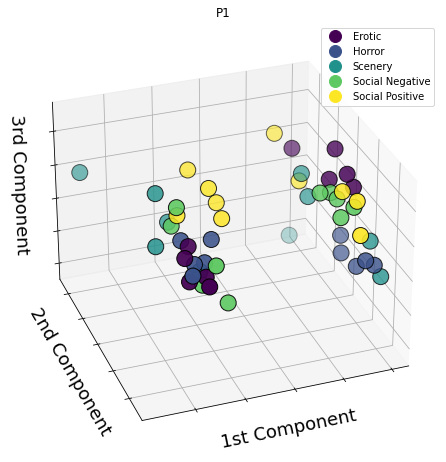

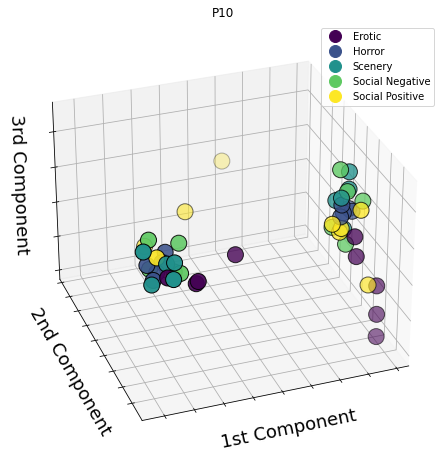

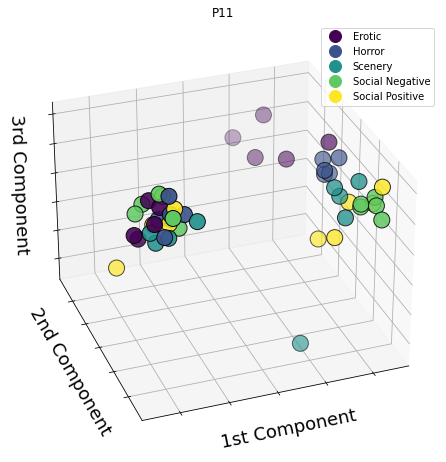

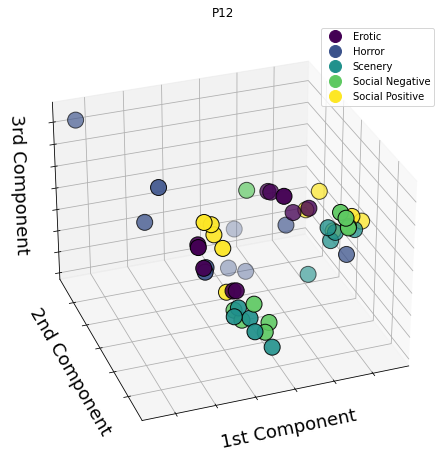

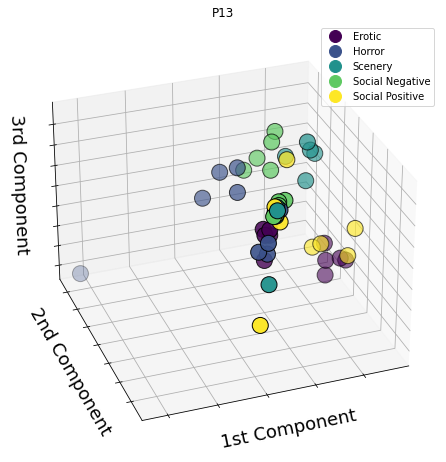

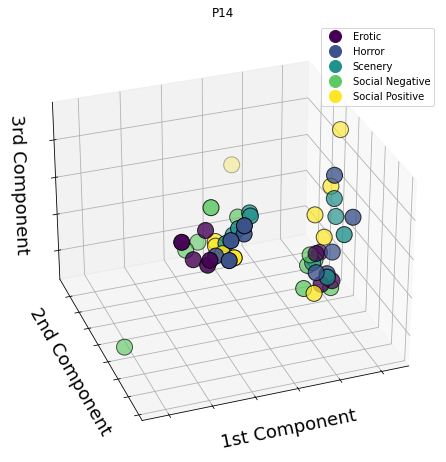

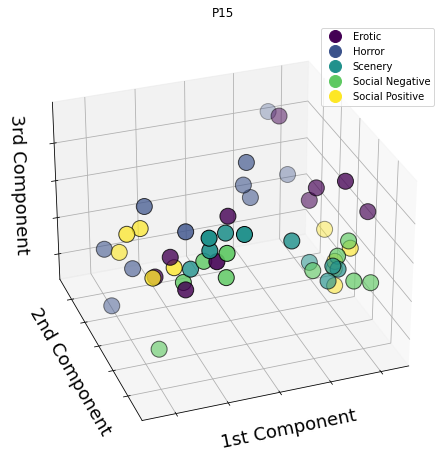

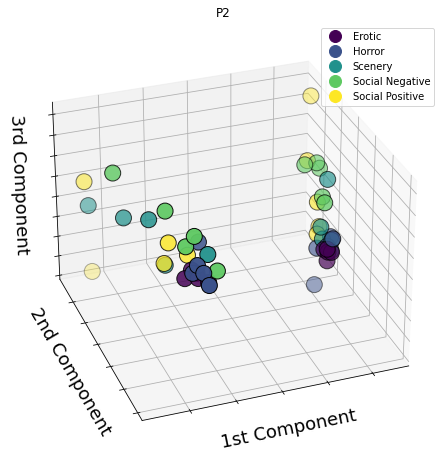

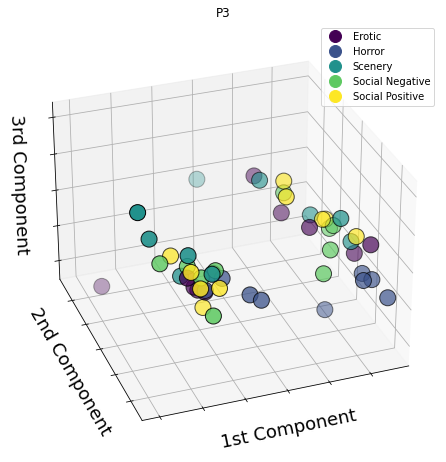

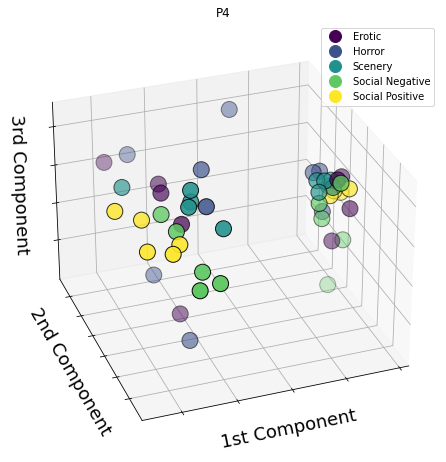

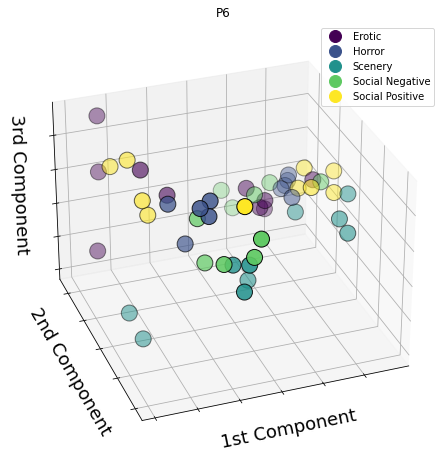

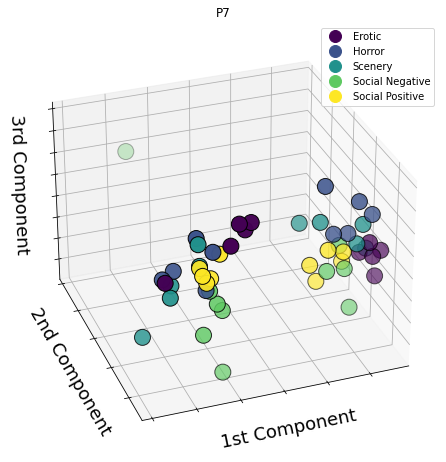

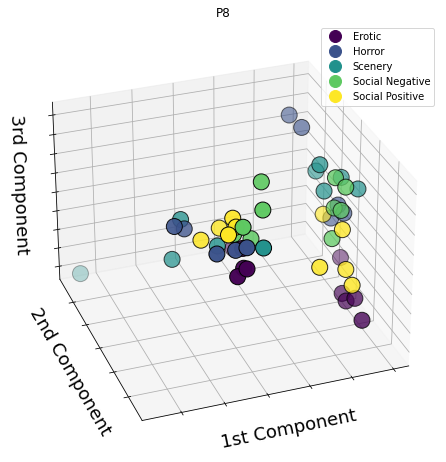

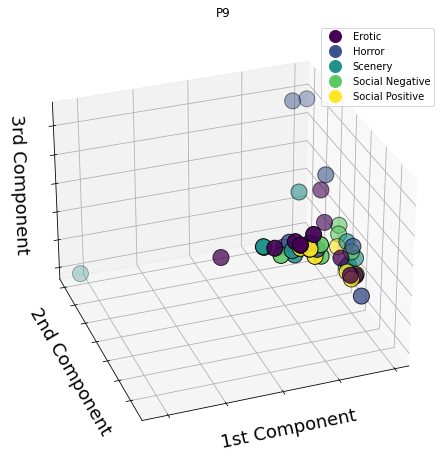

In [51]:
pca = PCA(n_components=3)

imp = SimpleImputer(missing_values=np.nan,strategy = "mean")
categories=["Erotic","Horror","Scenery","Social Negative","Social Positive"]
for user in users:
    
    X=np.array(full_dataframe[full_columns][full_dataframe["User"]==user])
    Y = np.array(full_dataframe["Category"][full_dataframe["User"]==user])
    
    colorlist=[]
    for category in full_dataframe["Category"][full_dataframe["User"]==user]:
        if category == "Erotic":
            colorlist.append(0)
        if category == "Horror":
            colorlist.append(1)
        if category == "Scenery":
            colorlist.append(2)
        if category == "Social Negative":
            colorlist.append(3)
        if category == "Social Positive":
            colorlist.append(4)

    imp.fit(X)
    X = imp.transform(X)
    
    scaler.fit(X,Y.ravel())
    X = scaler.transform(X)
    
    result = pca.fit(X)
    X_pca = result.transform(X)
    
    fig = plt.figure(figsize=(8, 6))
    ax = Axes3D(fig, elev=-150, azim=110,auto_add_to_figure=False)
    fig.add_axes(ax)
    ax.scatter(X_pca[:, 0],X_pca[:, 1],X_pca[:, 2],c=colorlist,edgecolor="k",s=256)
    ax.set_title(user)
    ax.set_xlabel("1st Component",fontsize=18)
    ax.w_xaxis.set_ticklabels([])
    ax.set_ylabel("2nd Component",fontsize=18)
    ax.w_yaxis.set_ticklabels([])
    ax.set_zlabel("3rd Component",fontsize=18)
    ax.w_zaxis.set_ticklabels([])
    plt.legend(handles=scatter.legend_elements()[0],labels=categories,markerscale=2)
    plt.show()
    
#     plt.figure()

#     plt.title(user,fontsize=18)
#     scatter = plt.scatter(X_pca[:,0],X_pca[:,1],c=colorlist)
#     plt.legend(handles=scatter.legend_elements()[0],labels=categories)

## Correlations

In [14]:
x=[]
for feature in full_dataframe[columns].columns:
    x.append([scipy.stats.spearmanr(full_dataframe[feature],df_ratings["Arousal"]),scipy.stats.spearmanr(full_dataframe[feature],df_ratings["Valence"]),scipy.stats.spearmanr(full_dataframe[feature],df_ratings["Dominance"]),scipy.stats.spearmanr(full_dataframe[feature],df_ratings["Anticipatory"]),scipy.stats.spearmanr(full_dataframe[feature],df_ratings["Control_Stress"]),scipy.stats.spearmanr(full_dataframe[feature],df_ratings["Intrinsic_Goal"]),scipy.stats.spearmanr(full_dataframe[feature],df_ratings["Novelty"]),scipy.stats.spearmanr(full_dataframe[feature],df_ratings["Perceived_Control"]),scipy.stats.spearmanr(full_dataframe[feature],df_ratings["Perceived_Obstacles"]),scipy.stats.spearmanr(full_dataframe[feature],df_ratings["Unexpectedness"])])

C:\ProgramData\Anaconda3\envs\1st Study\lib\site-packages\scipy\stats\stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


In [7]:
x=[]
for feature in dataframe_EEG[columns_EEG].columns:
    x.append([scipy.stats.spearmanr(dataframe_EEG[feature],df_ratings["Arousal"]),scipy.stats.spearmanr(dataframe_EEG[feature],df_ratings["Valence"]),scipy.stats.spearmanr(dataframe_EEG[feature],df_ratings["Dominance"]),scipy.stats.spearmanr(dataframe_EEG[feature],df_ratings["Anticipatory"]),scipy.stats.spearmanr(dataframe_EEG[feature],df_ratings["Control_Stress"]),scipy.stats.spearmanr(dataframe_EEG[feature],df_ratings["Intrinsic_Goal"]),scipy.stats.spearmanr(dataframe_EEG[feature],df_ratings["Novelty"]),scipy.stats.spearmanr(dataframe_EEG[feature],df_ratings["Perceived_Control"]),scipy.stats.spearmanr(dataframe_EEG[feature],df_ratings["Perceived_Obstacles"]),scipy.stats.spearmanr(dataframe_EEG[feature],df_ratings["Unexpectedness"])])

In [9]:
corr=[]
for i,rating in enumerate(df_ratings[columns_rating].columns):
    temp_list=[]
    for j, rating in enumerate(dataframe_EEG[columns_EEG].columns):
        temp_list.append(x[j][i][0])
    corr.append(temp_list)

In [10]:
corr = np.array(corr)
corr.shape

(10, 128)

In [12]:
plt.figure()
sns.heatmap(corr,cmap="plasma",linewidths=0.01,linecolor="k")#,annot=True,annot_kws={"rotation":0})
plt.yticks(range(len(columns_rating)),columns_rating,rotation=0,va="top")
plt.xticks(range(len(columns_EEG)),columns_EEG,rotation=90,ha='right',fontsize=8)
plt.title("Correlation Physiological Signals")
plt.show()

Using matplotlib backend: Qt5Agg


## PCA and LDA

In [21]:
colorlist=[]
for category in dataframe["Category"]:
    if category == "Erotic":
        colorlist.append(0)
    if category == "Horror":
        colorlist.append(1)
    if category == "Scenery":
        colorlist.append(2)
    if category == "Social Negative":
        colorlist.append(3)
    if category == "Social Positive":
        colorlist.append(4)

In [55]:
pca = PCA(n_components=3)
lda = LinearDiscriminantAnalysis()
result = pca.fit(X)
result_lda = lda.fit(X,Y.ravel())

In [237]:
result_lda.n_features_in_

216

In [239]:
print(np.cumsum(result_lda.explained_variance_ratio_))
plt.plot(np.cumsum(result_lda.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

[0.37551654 0.62529578 0.85376671 1.        ]


In [102]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')

Text(0, 0.5, 'Proportion of Variance Explained')

In [17]:
sns.heatmap(result.components_,cmap="plasma",linewidths=0.01,linecolor="k")
plt.xticks(range(len(columns)),columns,rotation=90,ha='center',fontsize=8)
plt.show()

Using matplotlib backend: Qt5Agg


In [39]:
X_pca = result.transform(X)
X_lda =  result_lda.transform(X)

In [12]:
np.cumsum(result_lda.explained_variance_ratio_)

array([0.37551654, 0.62529578, 0.85376671, 1.        ])

In [27]:
categories=['Erotic','Horror','Scenery','Social Negative','Social Positive']
scatter = plt.scatter(X_pca[:,0],X_pca[:,1],c=colorlist)
plt.legend(handles=scatter.legend_elements()[0],labels=list(dataframe["Category"]))

In [40]:
X_pca

array([[-19925.61891199, -21978.81702302,    366.91947581],
       [-19530.55886541, -21971.83581703,    382.37794969],
       [-20154.28503653, -21988.29057237,    370.51921336],
       ...,
       [-20603.32017644, -21952.33618404,    336.57743197],
       [-20552.22380521, -21950.17664706,    352.62637941],
       [-20509.16188068, -21893.7528292 ,    351.69718011]])

In [41]:
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(X_pca[:, 0],X_pca[:, 1],X_pca[:, 2],c=colorlist,cmap=plt.cm.Set1,edgecolor="k",s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st Component")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd Component")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd Component")
ax.w_zaxis.set_ticklabels([])
plt.show()

C:\ProgramData\Anaconda3\envs\1st Study\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  


In [21]:
kmeans=KMeans(n_clusters=5,random_state=0)
kmeans.fit(X_pca)
y_pred = kmeans.predict(X_pca)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 3, 3, 3, 0, 0, 0, 4, 0, 0, 0, 0,
       0, 0, 3, 3, 0, 2, 3, 3, 0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0,
       0, 0, 3, 0, 0, 0, 0, 0, 3, 2, 3, 0, 0, 0, 0,

## Classifiers

In [21]:
models=[]
# models.append(("KNN",neighbors.KNeighborsClassifier(n_neighbors=5)))
# models.append(("SVM",svm.SVC(C=1,kernel="rbf",probability=True,random_state=0)))
models.append(("Random Forest",ensemble.RandomForestClassifier(random_state=0)))
# models.append(("NN",MLPClassifier(random_state=0)))

In [27]:
%matplotlib
imp = SimpleImputer(missing_values=np.nan,strategy = "mean")

# model = ensemble.RandomForestClassifier(random_state=0)
# validator = GroupShuffleSplit(n_splits=10,test_size=0.25,random_state=0)
validator = LeaveOneGroupOut()
# validator = GroupKFold(n_splits=10)

# models_results={}

for model_name,model in models:
    
    print(model_name)
    
    accuracy,precision,f1_score,roc_auc,recall,y_true,y_predict=[],[],[],[],[],[],[]

    for train_index,test_index in validator.split(X,Y.ravel(),groups=groups):

            X_train, X_test = X[train_index], X[test_index]
            Y_train, Y_test = Y[train_index], Y[test_index]

            scaler.fit(X_train,Y_train.ravel())
            X_train = scaler.transform(X_train)
            X_test = scaler.transform(X_test)

            rfe = feature_selection.RFE(ensemble.RandomForestClassifier(random_state=0),step=1)
            rfe.fit(X_train,Y_train.ravel())
    #                     print(list(full_columns[rfe.get_support()==True]))
            X_train = rfe.transform(X_train)
            X_test = rfe.transform(X_test)

            model.fit(X_train,Y_train.ravel())

            accuracy.append(metrics.accuracy_score(Y_test,model.predict(X_test)))
            precision.append(metrics.precision_score(Y_test,model.predict(X_test),average="weighted",zero_division=1))
            f1_score.append(metrics.f1_score(Y_test,model.predict(X_test),average="weighted"))
            recall.append(metrics.recall_score(Y_test,model.predict(X_test),average="weighted"))
            roc_auc.append(metrics.roc_auc_score(Y_test.ravel(),model.predict_proba(X_test),average="weighted",multi_class="ovr"))

            y_true.append(Y_test)
            y_predict.append(model.predict(X_test))

    cm = metrics.confusion_matrix(np.concatenate(y_true),np.concatenate(y_predict),labels=model.classes_)
    disp = metrics.ConfusionMatrixDisplay(cm,display_labels=model.classes_)
    disp.plot()

    plt.xlabel("Predicted Label",fontsize=24)
    plt.ylabel("True Label",fontsize=24)
    plt.title(model_name,fontsize=32)
    plt.xticks(rotation=90,fontsize=18)
    plt.yticks(fontsize=18)
    font = {'family' : 'normal',
        'size'   : 26}
    plt.rc('font', **font)
    plt.show()

    results = (np.mean(accuracy),np.mean(precision),np.mean(f1_score),np.mean(recall),np.mean(roc_auc))

    models_results[model_name] = results

Using matplotlib backend: Qt5Agg
Random Forest


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


In [28]:
scores = pd.DataFrame.from_dict(models_results,orient="index",columns=["Accuracy","Precision","F1_score","Recall","ROC_AUC"])
scores *=100
scores
# scores.to_csv(r'G:\O meu disco\PhD\1st Study\Physiological_Data\Results\Geral_Physiological_scores.csv')

,Accuracy,Precision,F1_score,Recall,ROC_AUC
KNN,22.142857,30.404770,17.970607,22.142857,51.635714
SVM,21.000000,34.787819,14.895836,21.000000,54.512500
Random Forest,24.857143,28.705913,21.926340,24.857143,55.453571
NN,23.857143,29.255916,19.520133,23.857143,54.632143


User Tuned Classification - All sensors - RF+RFE+StratifiedKfold

In [20]:
%matplotlib inline
imp = SimpleImputer(missing_values=np.nan,strategy = "mean")

model = ensemble.RandomForestClassifier(random_state=0)
validator = StratifiedKFold(n_splits=10,shuffle=True,random_state=0)

users_dict={}

for user in users:
    
    print(user)
    
    X=np.array(full_dataframe[temp_columns][full_dataframe["User"]==user])
    Y = np.array(full_dataframe["Category"][full_dataframe["User"]==user])
    
    imp = imp.fit(X)
    X = imp.transform(X)
                
    accuracy,precision,f1_score,roc_auc,recall,y_true,y_predict=[],[],[],[],[],[],[]

    for train_index,test_index in validator.split(X,Y.ravel()):

            X_train, X_test = X[train_index], X[test_index]
            Y_train, Y_test = Y[train_index], Y[test_index]

            scaler = scaler.fit(X_train,Y_train.ravel())
            X_train = scaler.transform(X_train)
            X_test = scaler.transform(X_test)

            rfe = feature_selection.RFE(model,step=1)
            rfe = rfe.fit(X_train,Y_train.ravel())
#                     print(list(full_columns[rfe.get_support()==True]))
            X_train = rfe.transform(X_train)
            X_test = rfe.transform(X_test)

            model.fit(X_train,Y_train.ravel())

            accuracy.append(metrics.accuracy_score(Y_test,model.predict(X_test)))
            precision.append(metrics.precision_score(Y_test,model.predict(X_test),average="weighted",zero_division=1))
            f1_score.append(metrics.f1_score(Y_test,model.predict(X_test),average="weighted"))
            recall.append(metrics.recall_score(Y_test,model.predict(X_test),average="weighted"))
            roc_auc.append(metrics.roc_auc_score(Y_test,model.predict_proba(X_test),average="weighted",multi_class="ovr"))

#             y_true.append(Y_test)
#             y_predict.append(model.predict(X_test))

#     cm = metrics.confusion_matrix(np.concatenate(y_true),np.concatenate(y_predict),labels=model.classes_)
#     disp = metrics.ConfusionMatrixDisplay(cm,display_labels=model.classes_)
#     disp.plot()

#     plt.xlabel("Predicted Label",fontsize=20)
#     plt.ylabel("True Label",fontsize=20)
#     plt.title(user,fontsize=32)
#     plt.xticks(rotation=90,fontsize=12)
#     plt.yticks(fontsize=12)
#     plt.show()

    results = (np.mean(accuracy),np.mean(precision),np.mean(f1_score),np.mean(recall),np.mean(roc_auc))

    users_dict[user] = results

P1
P10
P11
P12
P13
P14
P15
P2
P3
P4
P6
P7
P8
P9


In [24]:
%matplotlib 
imp = SimpleImputer(missing_values=np.nan,strategy = "mean")

model = ensemble.RandomForestClassifier(random_state=0)
validator = StratifiedKFold(n_splits=10,shuffle=True,random_state=0)

users_dict={}

for user in users:
    
    print(user)
    
    X=np.array(full_dataframe[full_columns][full_dataframe["User"]==user])
    Y = np.array(full_dataframe["Category"][full_dataframe["User"]==user])
    
    imp = imp.fit(X)
    X = imp.transform(X)
                
    accuracy,precision,f1_score,roc_auc,recall,y_true,y_predict=[],[],[],[],[],[],[]

    for train_index,test_index in validator.split(X,Y.ravel()):

            X_train, X_test = X[train_index], X[test_index]
            Y_train, Y_test = Y[train_index], Y[test_index]

            scaler = scaler.fit(X_train,Y_train.ravel())
            X_train = scaler.transform(X_train)
            X_test = scaler.transform(X_test)

            rfe = feature_selection.RFE(model,step=1)
            rfe = rfe.fit(X_train,Y_train.ravel())
#                     print(list(full_columns[rfe.get_support()==True]))
            X_train = rfe.transform(X_train)
            X_test = rfe.transform(X_test)

            model.fit(X_train,Y_train.ravel())

            accuracy.append(metrics.accuracy_score(Y_test,model.predict(X_test)))
            precision.append(metrics.precision_score(Y_test,model.predict(X_test),average="weighted",zero_division=1))
            f1_score.append(metrics.f1_score(Y_test,model.predict(X_test),average="weighted"))
            recall.append(metrics.recall_score(Y_test,model.predict(X_test),average="weighted"))
            roc_auc.append(metrics.roc_auc_score(Y_test,model.predict_proba(X_test),average="weighted",multi_class="ovr"))

            y_true.append(Y_test)
            y_predict.append(model.predict(X_test))

    cm = metrics.confusion_matrix(np.concatenate(y_true),np.concatenate(y_predict),labels=model.classes_)
    disp = metrics.ConfusionMatrixDisplay(cm,display_labels=model.classes_)
    disp.plot()

    plt.xlabel("Predicted Label",fontsize=20)
    plt.ylabel("True Label",fontsize=20)
    plt.title(user,fontsize=32)
    plt.xticks(rotation=90,fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

    results = (np.mean(accuracy),np.mean(precision),np.mean(f1_score),np.mean(recall),np.mean(roc_auc))

    users_dict[user] = results

Using matplotlib backend: Qt5Agg
P1
P10
P11
P12
P13
P14
P15
P2
P3
P4
P6
P7
P8
P9


In [21]:
scores = pd.DataFrame.from_dict(users_dict,orient="index",columns=["Accuracy","Precision","F1_score","Recall","ROC_AUC"])
scores*=100
print(scores)
# scores.to_csv(r'G:\O meu disco\PhD\1st Study\Physiological_Data\Results\Physiological_scores.csv')

     Accuracy  Precision   F1_score  Recall  ROC_AUC
P1       74.0  84.666667  67.666667    74.0    94.75
P10      70.0  82.666667  63.666667    70.0    90.25
P11      88.0  94.000000  84.000000    88.0    96.00
P12      72.0  85.000000  63.333333    72.0    92.50
P13      66.0  80.666667  57.000000    66.0    89.00
P14      62.0  77.333333  56.000000    62.0    87.75
P15      80.0  89.666667  74.333333    80.0    95.75
P2       66.0  79.666667  57.666667    66.0    91.25
P3       66.0  78.000000  58.000000    66.0    84.00
P4       70.0  82.000000  62.000000    70.0    87.75
P6       58.0  76.333333  48.666667    58.0    85.75
P7       70.0  82.333333  63.333333    70.0    91.50
P8       70.0  79.000000  64.000000    70.0    89.00
P9       68.0  81.333333  60.666667    68.0    89.75


In [22]:
print("Average = "+str(np.mean(scores["Accuracy"])))

Average = 70.0


Tets Classifiers on remaining users

In [14]:
%matplotlib inline

models,selectors,scalers,imputers = {},{},{},{}
final_results_dict={}
final_results=[]
for user in users:
    
    print(user)
    
    imp = SimpleImputer(missing_values=np.nan,strategy = "mean")

    model = ensemble.RandomForestClassifier(random_state=0)
    validator = StratifiedKFold(n_splits=10,shuffle=True,random_state=0)

    X=np.array(full_dataframe[full_columns][full_dataframe["User"]==user])
    Y = np.array(full_dataframe["Category"][full_dataframe["User"]==user])
    
    imp = imp.fit(X)
    X = imp.transform(X)
                
    scaler = scaler.fit(X,Y.ravel())
    X = scaler.transform(X)

    rfe = feature_selection.RFE(model,step=1)
    selector = rfe.fit(X,Y.ravel())
    X = selector.transform(X)

    clf = model.fit(X,Y.ravel())
    
    results_dict={}
    results=[]
    
    for user_model in users:
        
        X=np.array(full_dataframe[full_columns][full_dataframe["User"]==user_model])
        Y = np.array(full_dataframe["Category"][full_dataframe["User"]==user_model])
        
        X = imp.transform(X)
        X = scaler.transform(X)
        X = selector.transform(X)
        r = clf.predict(X)

        accuracy = metrics.accuracy_score(Y,r)*100
        results.append(int(accuracy))
        results_dict[user_model] = int(accuracy)
    
    final_results_dict[user] = results_dict
    final_results.append(results)

P1
P10
P11
P12
P13
P14
P15
P2
P3
P4
P6
P7
P8
P9


In [15]:
final_results

[[100, 26, 18, 24, 24, 20, 20, 24, 20, 22, 26, 16, 20, 12],
 [30, 100, 22, 12, 28, 22, 30, 28, 18, 24, 24, 24, 24, 16],
 [24, 22, 100, 24, 18, 18, 28, 16, 16, 26, 16, 18, 30, 20],
 [16, 6, 28, 100, 30, 6, 26, 14, 22, 32, 16, 14, 30, 28],
 [20, 16, 18, 28, 100, 16, 20, 12, 14, 26, 26, 12, 30, 20],
 [26, 22, 18, 18, 12, 100, 14, 22, 26, 18, 24, 16, 18, 14],
 [24, 30, 34, 34, 14, 30, 100, 32, 24, 14, 16, 28, 28, 24],
 [20, 26, 20, 24, 22, 28, 28, 100, 24, 22, 26, 22, 10, 16],
 [18, 20, 26, 16, 10, 20, 18, 20, 100, 20, 18, 20, 24, 32],
 [10, 26, 14, 26, 32, 14, 34, 16, 22, 100, 14, 24, 28, 20],
 [20, 20, 20, 20, 20, 20, 22, 20, 22, 20, 100, 18, 18, 18],
 [22, 20, 22, 20, 20, 20, 20, 18, 20, 20, 28, 100, 28, 20],
 [18, 22, 26, 30, 28, 28, 28, 20, 18, 24, 24, 14, 100, 34],
 [20, 26, 28, 26, 18, 26, 26, 22, 24, 22, 24, 32, 42, 100]]

In [19]:
%matplotlib 
plt.figure()
font = {'family' : 'normal',
'size'   : 38}
plt.rc('font', **font)
sns.heatmap(final_results,xticklabels=final_results_dict.keys(),yticklabels=final_results_dict.keys(),cmap='viridis',cbar=True,annot=True,fmt="d",annot_kws={'fontsize':38})
plt.xticks(fontsize=32)
plt.yticks(fontsize=32)
plt.tight_layout()

Using matplotlib backend: Qt5Agg
